# Prepapre Numerical Data

## Load FOMC class

In [1]:
from ekorpkit import eKonf

cfg = eKonf.compose(config_group="io/fetcher=fomc")
cfg.output_dir = "./data"
fomc = eKonf.instantiate(cfg.base, **cfg.fomc)

### Chairpersons

In [2]:
fomc.chair

,surname,first_name,from_date,to_date
0,Volcker,Paul,1979-08-06,1987-08-10
1,Greenspan,Alan,1987-08-11,2006-01-31
2,Bernanke,Ben,2006-02-01,2014-01-31
3,Yellen,Janet,2014-02-03,2018-02-03
4,Powell,Jerome,2018-02-05,2022-05-19


### Load Calendar

In [3]:
fomc.load_calendar(from_year=1982, force_download=False)

,unscheduled,forecast,confcall,chair
date,,,,
1982-02-02,False,False,False,Paul Volcker
1982-03-30,False,False,False,Paul Volcker
1982-05-18,False,False,False,Paul Volcker
1982-05-20,False,False,True,Paul Volcker
1982-06-01,False,False,False,Paul Volcker
...,...,...,...,...
2022-06-15,False,True,False,other
2022-07-27,False,False,False,other
2022-09-21,False,True,False,other


In [4]:
print(fomc.calendar.shape)
fomc.calendar

(427, 4)


,unscheduled,forecast,confcall,chair
date,,,,
1982-02-02,False,False,False,Paul Volcker
1982-03-30,False,False,False,Paul Volcker
1982-05-18,False,False,False,Paul Volcker
1982-05-20,False,False,True,Paul Volcker
1982-06-01,False,False,False,Paul Volcker
...,...,...,...,...
2022-06-15,False,True,False,other
2022-07-27,False,False,False,other
2022-09-21,False,True,False,other


## Load Market Data

### Target FED Rate


In [5]:
cfg = eKonf.compose(config_group="io/fetcher=fred")
cfg.name = "DFEDTAR"
cfg.series_id = ["DFEDTAR", "DFEDTARU"]
fred = eKonf.instantiate(cfg)

fedrates = fred.data.copy()
fedrates

,DFEDTAR,diff,series_id
1982-09-27,10.25,NaN,DFEDTAR
1982-09-28,10.25,0.00,DFEDTAR
1982-09-29,10.25,0.00,DFEDTAR
1982-09-30,10.25,0.00,DFEDTAR
1982-10-01,10.00,-0.25,DFEDTAR
...,...,...,...
2022-05-14,1.00,0.00,DFEDTARU
2022-05-15,1.00,0.00,DFEDTARU
2022-05-16,1.00,0.00,DFEDTARU
2022-05-17,1.00,0.00,DFEDTARU


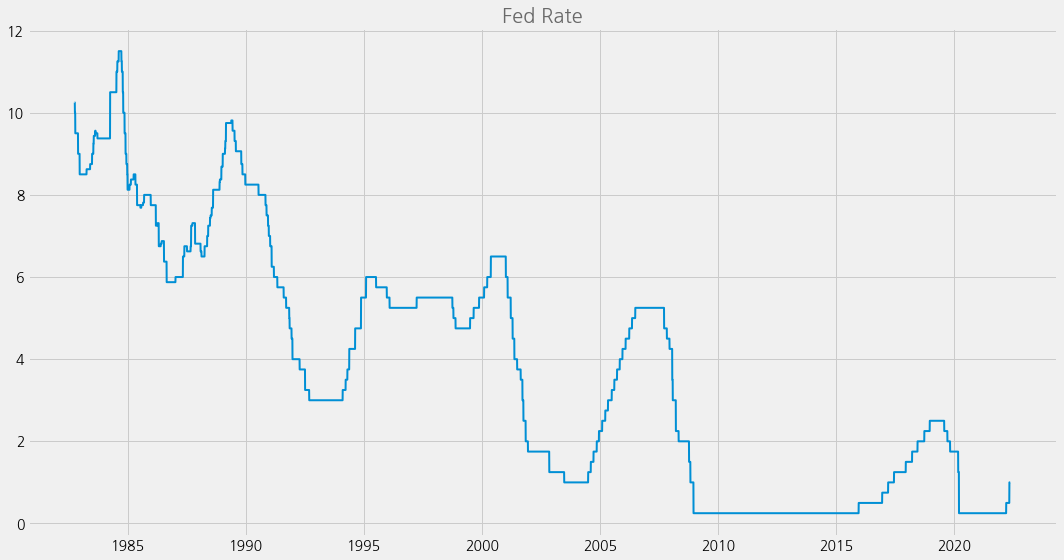

In [6]:
cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.dataset.y = 'DFEDTAR'
cfg.dataset.form = 'wide'
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Fed Rate'
eKonf.instantiate(cfg, data=fedrates)

### Effective FED Rate

In [8]:
dff = fred.load(series_id="DFF")
dff["diff"] = dff.DFF.diff()
dff

,DFF,diff
1954-07-01,1.13,NaN
1954-07-02,1.25,0.12
1954-07-03,1.25,0.00
1954-07-04,1.25,0.00
1954-07-05,0.88,-0.37
...,...,...
2022-05-13,0.83,0.00
2022-05-14,0.83,0.00
2022-05-15,0.83,0.00
2022-05-16,0.83,0.00


(827, 2)


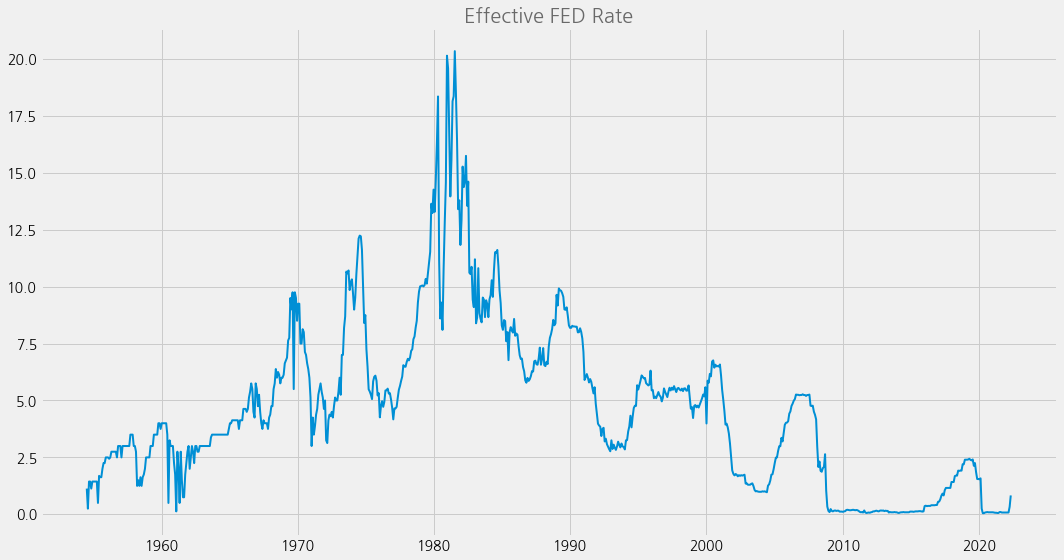

In [9]:
# Use every 30th row as it has too many data points
dff_30 = dff.iloc[::30, :]
print(dff_30.shape)

cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.dataset.y = "DFF"
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Effective FED Rate'
eKonf.instantiate(cfg, data=dff_30)

## Load Economic Indices

### GDP

Real GDP, Quarterly announced

In [10]:
# Load Real GDP
# Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate
gdpc1 = fred.load(series_id="GDPC1")
 
# Add difference from previous value
gdpc1['diff_prev'] = gdpc1['GDPC1'].diff() / gdpc1['GDPC1'].shift(1) * 100
gdpc1['diff_year'] = gdpc1['GDPC1'].diff(periods=4) / gdpc1['GDPC1'].shift(4) * 100
gdpc1

,GDPC1,diff,diff_prev,diff_year
1947-01-01,2034.450,NaN,NaN,NaN
1947-04-01,2029.024,-5.426,-0.266706,NaN
1947-07-01,2024.834,-4.190,-0.206503,NaN
1947-10-01,2056.508,31.674,1.564276,NaN
1948-01-01,2087.442,30.934,1.504200,2.604733
...,...,...,...,...
2021-01-01,19055.655,287.877,1.533890,0.546977
2021-04-01,19368.310,312.655,1.640747,12.226677
2021-07-01,19478.893,110.583,0.570948,4.946556
2021-10-01,19806.290,327.397,1.680778,5.533484


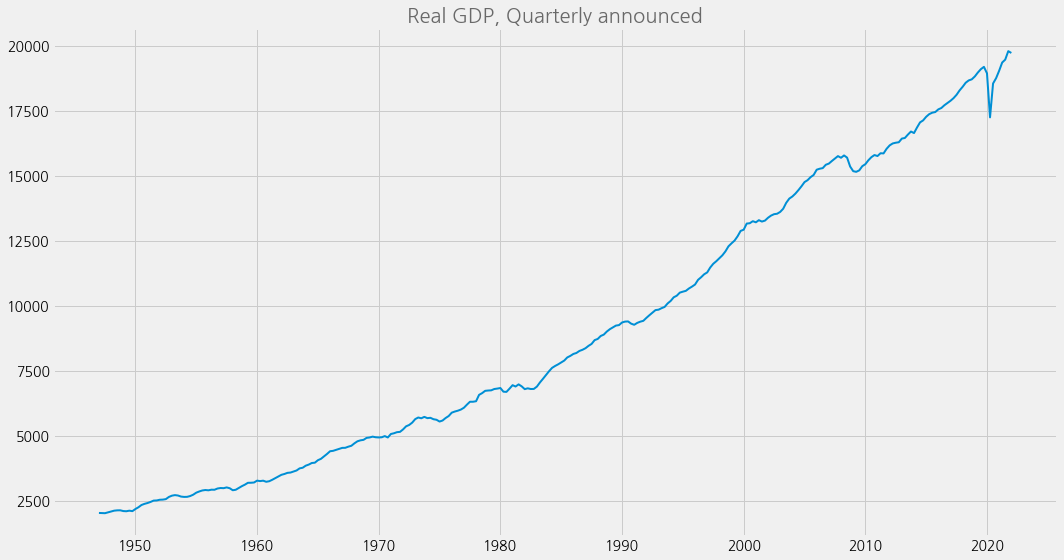

In [11]:
cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.dataset.y = "GDPC1"
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Real GDP, Quarterly announced'
eKonf.instantiate(cfg, data=gdpc1)

### Potential GDP

In [12]:
# Load Real Potential GDP
# Billions of Chained 2012 Dollars, Not Seasonally Adjusted
gdppot = fred.load(series_id="GDPPOT")

# Add difference from previous value
gdppot['diff_prev'] = gdppot['GDPPOT'].diff() / gdppot['GDPPOT'].shift(1) * 100
gdppot['diff_year'] = gdppot['GDPPOT'].diff(periods=4) / gdppot['GDPPOT'].shift(4) * 100
gdppot

,GDPPOT,diff,diff_prev,diff_year
1949-01-01,2102.982630,NaN,NaN,NaN
1949-04-01,2130.581305,27.598675,1.312359,NaN
1949-07-01,2159.340530,28.759225,1.349830,NaN
1949-10-01,2186.844859,27.504329,1.273737,NaN
1950-01-01,2216.058359,29.213500,1.335874,5.376922
...,...,...,...,...
2030-10-01,23423.370000,98.770000,0.423458,1.708386
2031-01-01,23522.550000,99.180000,0.423423,1.706249
2031-04-01,23622.050000,99.500000,0.422998,1.704632
2031-07-01,23721.650000,99.600000,0.421640,1.702280


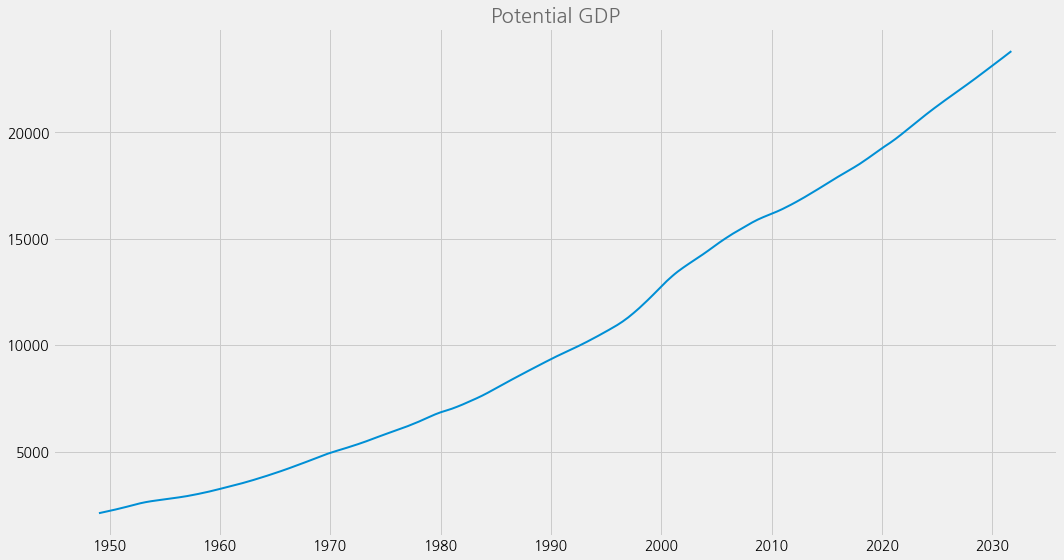

In [13]:
cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.dataset.y = "GDPPOT"
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Potential GDP'
eKonf.instantiate(cfg, data=gdppot)

### Personal Consumption: PCE

Use Core PCE excluding Food and Energy as FRB takes this index as important indicator. <BR />
It is announced monthly around the last working days of each month for the previous month.

In [14]:
# Load Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index)
# Index 2012=100, Seasonally Adjusted
pcepilfe = fred.load(series_id="PCEPILFE")
# Add difference from previous value
pcepilfe['diff_prev'] = pcepilfe['PCEPILFE'].diff() / pcepilfe['PCEPILFE'].shift(1) * 100
pcepilfe['diff_year'] = pcepilfe['PCEPILFE'].diff(periods=12) / pcepilfe['PCEPILFE'].shift(12) * 100
pcepilfe

,PCEPILFE,diff,diff_prev,diff_year
1959-01-01,16.688,NaN,NaN,NaN
1959-02-01,16.701,0.013,0.077900,NaN
1959-03-01,16.719,0.018,0.107778,NaN
1959-04-01,16.762,0.043,0.257192,NaN
1959-05-01,16.783,0.021,0.125283,NaN
...,...,...,...,...
2021-11-01,119.483,0.568,0.477652,4.686596
2021-12-01,120.092,0.609,0.509696,4.889339
2022-01-01,120.660,0.568,0.472971,5.153992
2022-02-01,121.005,0.345,0.285927,5.314232


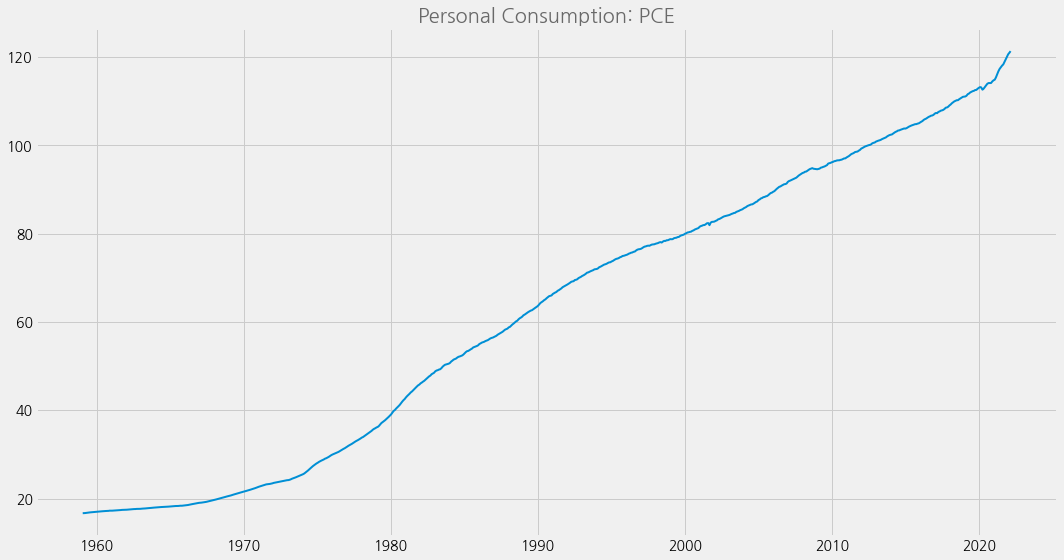

In [15]:
cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.dataset.y = "PCEPILFE"
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Personal Consumption: PCE'
eKonf.instantiate(cfg, data=pcepilfe)

### Personal Consumption: CPI

CPI's coverage is less than PCE but announced monthly around 10th of each month for the previous month, which is earlier than PCE. <BR />
As this is available to some meetings even before PCE announcement, take this index as well.

In [16]:
# Load Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
# Index 1982-1984=100, Seasonally Adjusted
cpiaucsl = fred.load(series_id="CPIAUCSL")
# Add difference from previous value
cpiaucsl['diff_prev'] = cpiaucsl['CPIAUCSL'].diff() / cpiaucsl['CPIAUCSL'].shift(1) * 100
cpiaucsl['diff_year'] = cpiaucsl['CPIAUCSL'].diff(periods=12) / cpiaucsl['CPIAUCSL'].shift(12) * 100
cpiaucsl


,CPIAUCSL,diff,diff_prev,diff_year
1947-01-01,21.480,NaN,NaN,NaN
1947-02-01,21.620,0.140,0.651769,NaN
1947-03-01,22.000,0.380,1.757632,NaN
1947-04-01,22.000,0.000,0.000000,NaN
1947-05-01,21.950,-0.050,-0.227273,NaN
...,...,...,...,...
2021-12-01,280.126,1.602,0.575175,7.096542
2022-01-01,281.933,1.807,0.645067,7.525934
2022-02-01,284.182,2.249,0.797707,7.912024
2022-03-01,287.708,3.526,1.240754,8.557586


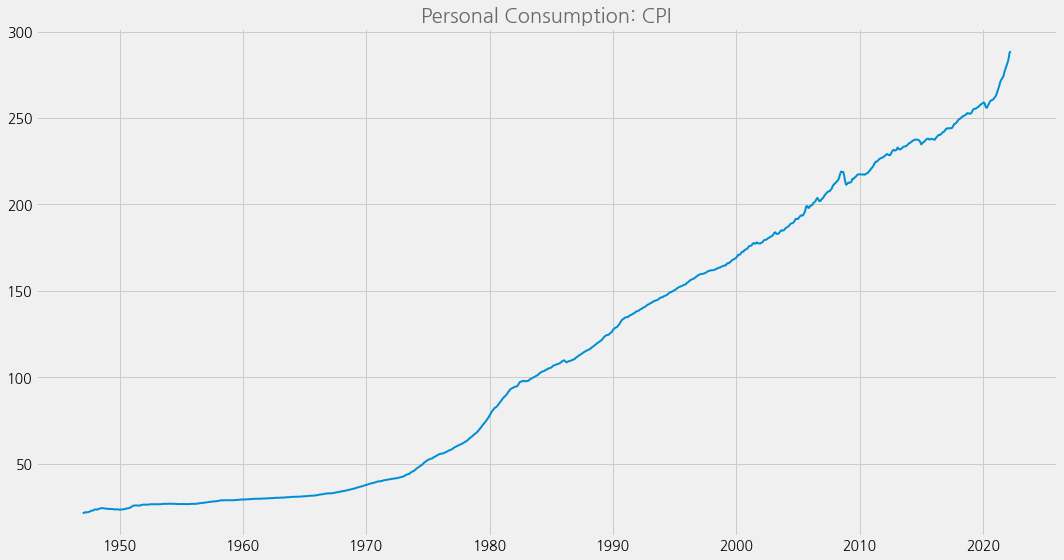

In [17]:
cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.dataset.y = "CPIAUCSL"
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Personal Consumption: CPI'
eKonf.instantiate(cfg, data=cpiaucsl)

### Unemployment

Takes unemployment rate as important input for FRB's decision. Real Potential GDP is quarterly and usually two month after each quarter. On the other hand, unemployment is annnounced monthly, around a week after the end of each month and can be more real-time. <BR />
As bigger number indicates negative, turn the sign to have negative number.

In [18]:
# Load Unemployment
# Percent, Seasonally Adjusted
unrate = fred.load(series_id="UNRATE")
unrate['UNRATE'] = unrate['UNRATE'] * -1
# Add difference from previous value
unrate['diff_prev'] = unrate['UNRATE'].diff()
unrate['diff_year'] = unrate['UNRATE'].diff(periods=12)
unrate

,UNRATE,diff,diff_prev,diff_year
1948-01-01,-3.4,NaN,NaN,NaN
1948-02-01,-3.8,0.4,-0.4,NaN
1948-03-01,-4.0,0.2,-0.2,NaN
1948-04-01,-3.9,-0.1,0.1,NaN
1948-05-01,-3.5,-0.4,0.4,NaN
...,...,...,...,...
2021-12-01,-3.9,-0.3,0.3,2.8
2022-01-01,-4.0,0.1,-0.1,2.4
2022-02-01,-3.8,-0.2,0.2,2.4
2022-03-01,-3.6,-0.2,0.2,2.4


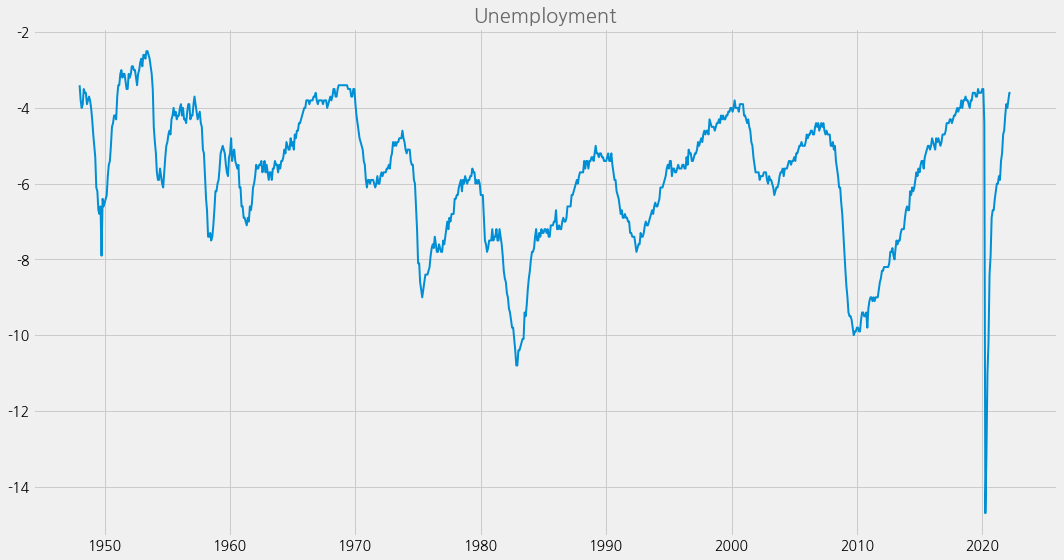

In [19]:
cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.dataset.y = "UNRATE"
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Unemployment'
eKonf.instantiate(cfg, data=unrate)

### Employment

In [20]:
# Load Employment
# Seasonally Adjusted
payems = fred.load(series_id="PAYEMS")
# Add difference from previous value
payems['diff_prev'] = payems['PAYEMS'].diff()
payems['diff_year'] = payems['PAYEMS'].diff(periods=12)
payems

,PAYEMS,diff,diff_prev,diff_year
1939-01-01,29923.0,NaN,NaN,NaN
1939-02-01,30100.0,177.0,177.0,NaN
1939-03-01,30280.0,180.0,180.0,NaN
1939-04-01,30094.0,-186.0,-186.0,NaN
1939-05-01,30299.0,205.0,205.0,NaN
...,...,...,...,...
2021-12-01,149240.0,588.0,588.0,6743.0
2022-01-01,149744.0,504.0,504.0,6727.0
2022-02-01,150458.0,714.0,714.0,6731.0
2022-03-01,150886.0,428.0,428.0,6455.0


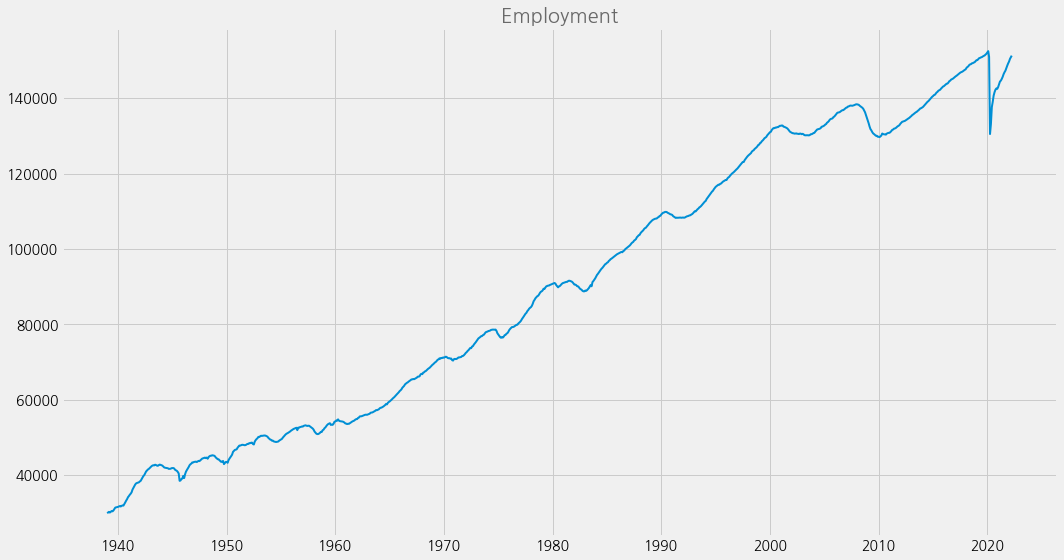

In [21]:
cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.dataset.y = "PAYEMS"
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Employment'
eKonf.instantiate(cfg, data=payems)

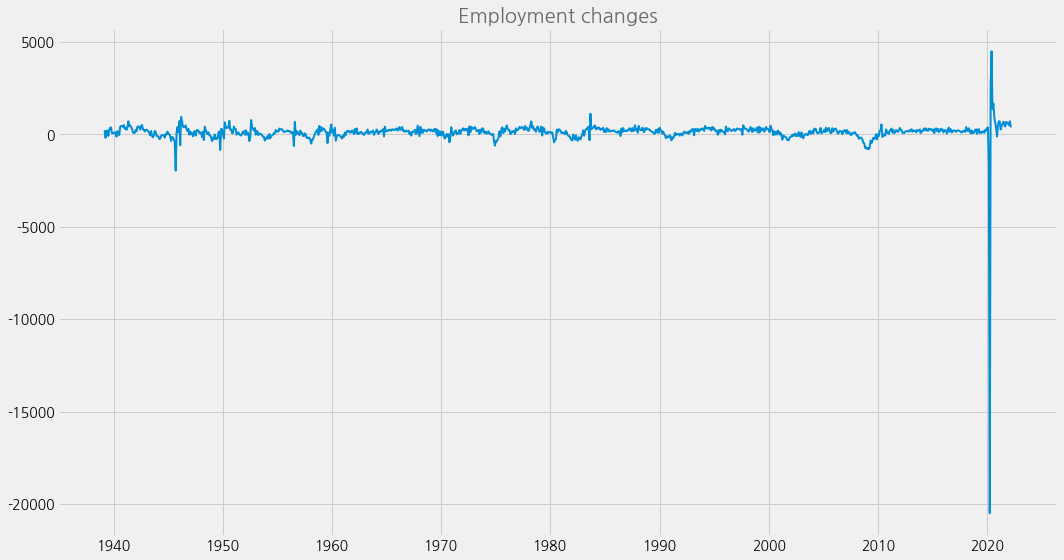

In [22]:
cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.dataset.y = "diff_prev"
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Employment changes'
eKonf.instantiate(cfg, data=payems)

### Retail Sales
Retail sales is an important indicator of the current economic situation.
It is usually announced around the middle of each month (15th) for the previous month.

In [23]:
# Load Advance Real Retail and Food Services Sales
# Millions of 1982-84 CPI Adjusted Dollars, Seasonally Adjusted

rrsfs = fred.load(series_id="RRSFS")
# Add difference from previous value
rrsfs['diff_prev'] = rrsfs['RRSFS'].diff() / rrsfs['RRSFS'].shift(1) * 100
rrsfs['diff_year'] = rrsfs['RRSFS'].diff(periods=12) / rrsfs['RRSFS'].shift(12) * 100
rrsfs


,RRSFS,diff,diff_prev,diff_year
1992-01-01,118651.0,NaN,NaN,NaN
1992-02-01,118480.0,-171.0,-0.144120,NaN
1992-03-01,117700.0,-780.0,-0.658339,NaN
1992-04-01,118156.0,456.0,0.387426,NaN
1992-05-01,118548.0,392.0,0.331765,NaN
...,...,...,...,...
2021-12-01,226467.0,-5018.0,-2.167743,9.101289
2022-01-01,231103.0,4636.0,2.047097,5.783456
2022-02-01,233062.0,1959.0,0.847674,9.076698
2022-03-01,233448.0,386.0,0.165621,-1.123253


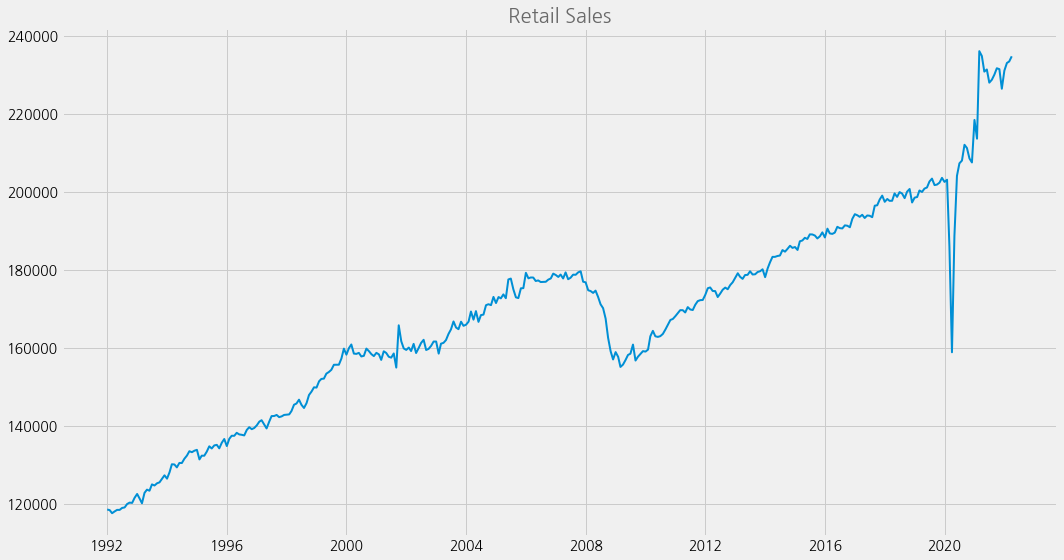

In [24]:
cfg = eKonf.compose(config_group="visualize/plot=lineplot")
cfg.dataset.y = "RRSFS"
cfg.plot.figsize = (15, 8)
cfg.figure.title = "Retail Sales"
eKonf.instantiate(cfg, data=rrsfs)

### New Home Sales
New home sales is another important index to know the retail sales figure. <br />
It is usually announced around a week before the end of each month for the previous month.

In [25]:
hsn1f = fred.load(series_id="HSN1F")
# Add difference from previous value
hsn1f['diff_prev'] = hsn1f['HSN1F'].diff() / hsn1f['HSN1F'].shift(1) * 100
hsn1f['diff_year'] = hsn1f['HSN1F'].diff(periods=12) / hsn1f['HSN1F'].shift(12) * 100
hsn1f

,HSN1F,diff,diff_prev,diff_year
1963-01-01,591.0,NaN,NaN,NaN
1963-02-01,464.0,-127.0,-21.489002,NaN
1963-03-01,461.0,-3.0,-0.646552,NaN
1963-04-01,605.0,144.0,31.236443,NaN
1963-05-01,586.0,-19.0,-3.140496,NaN
...,...,...,...,...
2021-11-01,753.0,86.0,12.893553,-12.947977
2021-12-01,871.0,118.0,15.670651,-7.635207
2022-01-01,845.0,-26.0,-2.985075,-14.904330
2022-02-01,835.0,-10.0,-1.183432,1.458080


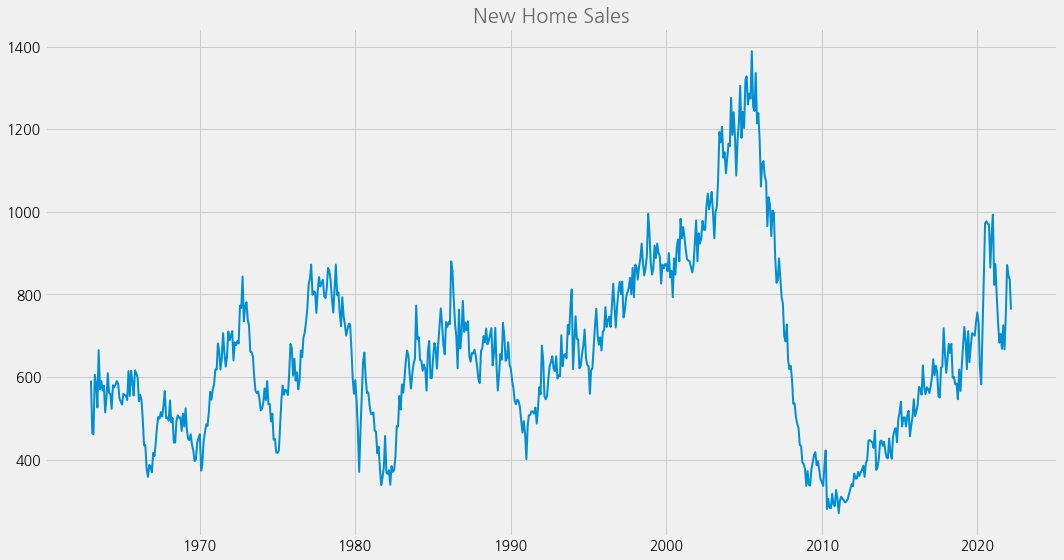

In [26]:
cfg = eKonf.compose(config_group="visualize/plot=lineplot")
cfg.dataset.y = "HSN1F"
cfg.plot.figsize = (15, 8)
cfg.figure.title = "New Home Sales"
eKonf.instantiate(cfg, data=hsn1f)

### Treasury Yield
#### Getting from US Treasury Site as xml

In [27]:
import pandas as pd

treasury_yield_url = "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/all/all?type=daily_treasury_yield_curve&field_tdr_date_value=all&data=yieldAll&page&_format=csv"
treasury = pd.read_csv(treasury_yield_url)
treasury['Date'] = pd.to_datetime(treasury['Date'])
treasury.set_index('Date', inplace=True)
treasury

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-05-18,0.56,0.85,1.03,1.56,2.16,2.68,2.84,2.89,2.91,2.88,3.24,3.06
2022-05-17,0.61,0.85,1.06,1.57,2.16,2.71,2.89,2.96,3.00,2.98,3.36,3.17
2022-05-16,0.64,0.85,1.07,1.54,2.07,2.58,2.75,2.83,2.89,2.88,3.30,3.09
2022-05-13,0.67,0.79,1.03,1.47,2.04,2.61,2.79,2.89,2.95,2.93,3.32,3.10
2022-05-12,0.61,0.77,0.96,1.44,1.96,2.56,2.73,2.81,2.86,2.84,3.22,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04


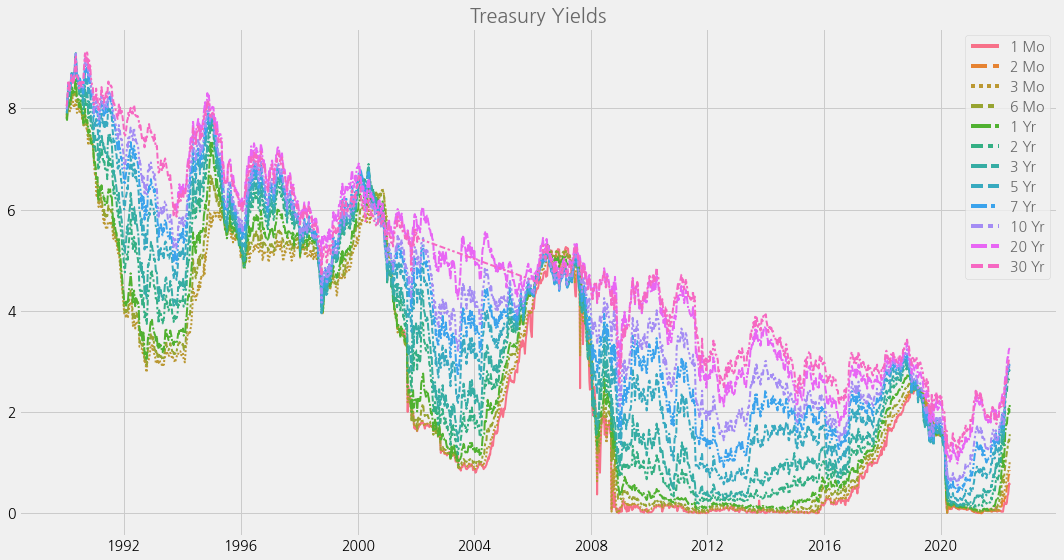

In [28]:
# Use every 5th row as it has too many data points
treasury_5 = treasury.iloc[::5, :]

cfg = eKonf.compose(config_group="visualize/plot=lineplot")
cfg.dataset.y = list(treasury_5.columns)
cfg.plot.figsize = (15, 8)
cfg.figure.title = "Treasury Yields"
eKonf.instantiate(cfg, data=treasury_5)

## Process the data

### Add Rate and Decisions

In [7]:
fomc.add_decisions_to_calendar(fedrates)
fomc_calendar = fomc.calendar.copy()
fomc_calendar

100%|██████████| 427/427 [00:42<00:00,  9.94it/s]


,unscheduled,forecast,confcall,chair,rate,rate_change,rate_decision
date,,,,,,,
1982-10-05,False,False,False,Paul Volcker,9.50,-0.50,-1
1982-11-16,False,False,False,Paul Volcker,9.00,-0.50,-1
1982-12-21,False,False,False,Paul Volcker,8.50,0.00,0
1983-01-14,False,False,True,Paul Volcker,8.50,0.00,0
1983-01-21,False,False,True,Paul Volcker,8.50,0.00,0
...,...,...,...,...,...,...,...
2021-11-03,False,False,False,Jerome Powell,0.25,0.00,0
2021-12-15,False,True,False,Jerome Powell,0.25,0.00,0
2022-01-26,False,False,False,Jerome Powell,0.25,0.00,0


Though this is not perfect as Target Rate was sometimes changed between FOMC meetings, enough to analyze the impact of FOMC Meetings.

## Add Quantitative Easing as a Lower event
Between 2008 and 2016 saw zero interest rate. Main monetary measure shifted to quantity from rate. Thus, add "lower" events when those QE was announced.

In [8]:
fomc.add_unconventionals_to_calendar()
fomc_calendar = fomc.calendar.copy()
fomc_calendar

,unscheduled,forecast,confcall,chair,rate,rate_change,rate_decision,rate_changed
date,,,,,,,,
1982-10-05,False,False,False,Paul Volcker,9.50,-0.50,-1,1
1982-11-16,False,False,False,Paul Volcker,9.00,-0.50,-1,1
1982-12-21,False,False,False,Paul Volcker,8.50,0.00,0,0
1983-01-14,False,False,True,Paul Volcker,8.50,0.00,0,0
1983-01-21,False,False,True,Paul Volcker,8.50,0.00,0,0
...,...,...,...,...,...,...,...,...
2021-11-03,False,False,False,Jerome Powell,0.25,0.00,0,0
2021-12-15,False,True,False,Jerome Powell,0.25,0.00,0,0
2022-01-26,False,False,False,Jerome Powell,0.25,0.00,0,0


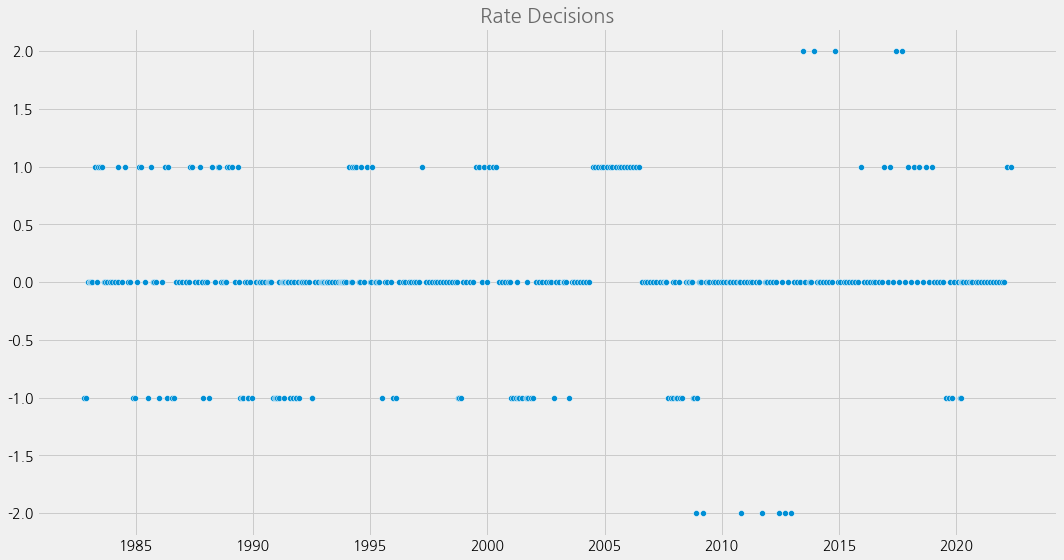

In [9]:
cfg = eKonf.compose(config_group="visualize/plot=scatter")
cfg.dataset.y = "rate_decision"
cfg.plot.figsize = (15, 8)
cfg.figure.title = "Rate Decisions"
eKonf.instantiate(cfg, data=fomc_calendar)